In [12]:
# CNN for Image Classification using TensorFlow/Keras
# Dataset: CIFAR-10

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [14]:
# Load CIFAR-10 dataset (auto-download) and normalize pixels
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 244s 1us/step


In [16]:
# Class names for CIFAR-10
class_names = ['airplane', 'car', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

In [18]:
# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # Output for 10 classes
])

C:\Users\joshi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# Compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
# Train model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 49ms/step - accuracy: 0.3561 - loss: 1.7308 - val_accuracy: 0.5631 - val_loss: 1.2181
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 49ms/step - accuracy: 0.5863 - loss: 1.1695 - val_accuracy: 0.6045 - val_loss: 1.0986
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.6511 - loss: 1.0064 - val_accuracy: 0.6490 - val_loss: 1.0047
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 46ms/step - accuracy: 0.6847 - loss: 0.9075 - val_accuracy: 0.6637 - val_loss: 0.9724
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.7152 - loss: 0.8142 - val_accuracy: 0.6948 - val_loss: 0.9015


In [26]:
# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.2f}")

313/313 - 3s - 8ms/step - accuracy: 0.6948 - loss: 0.9015

Test Accuracy: 0.69


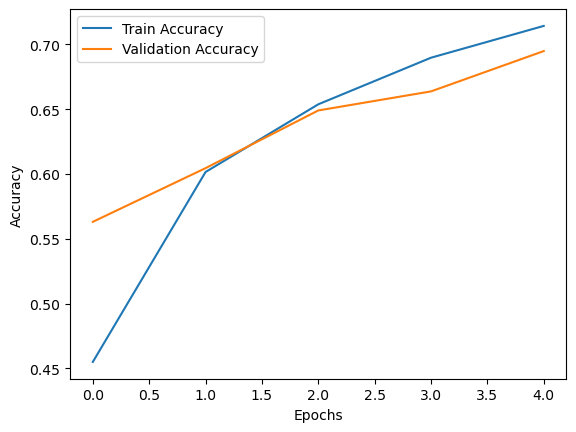

In [28]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()